### t-SNE Visualization 

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import loadtxt

from tools import *



### Loading Data

In [2]:
X_train, y_train = load_data()



Loading train data

Finished loading train data



### t-SNE Embedding

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


#### As we had seen prior with our experimentation with the explained variance of features we will first decide to perform PCA on the training data to reduce the dimension of the images. We will then perform this t-SNE embedding. Currently, we will ensure to retain 90 percent of the variance when reducing the dimensionality of our data-set. For the purposes of data-visualization we have also decided to choose a sub-sample of the existing data due to the quadratic cost of the t-SNE visualization. Due to the fact we also have 200 classes, we have also decided to perform the t-SNE embedding on a small subset of the classes.

In [28]:
num_samples = 100000
num_classes = 200
classes_to_choose = 5
classes_to_visualize = np.random.choice(num_classes, classes_to_choose)
X, y = X_train[:num_samples], y_train[:num_samples]

X_filtered, y_filtered = [], []

for x,label in zip(X,y):
    if label in classes_to_visualize:
        X_filtered.append(x)
        y_filtered.append(label)
X_filtered = np.array(X_filtered)
y_filtered = np.array(y_filtered)

In [29]:
labels = get_label_dict()
words = get_word_labels()
num_samples = X_filtered.shape[0]
y_labels = []
for i in range(num_samples):
    y_labels.append(words[labels[y_filtered[i]]][0].lower())

Loading labels

Done

Loading words

Done



In [30]:
pca = PCA(n_components=0.90, svd_solver='full')
X_fit= pca.fit_transform(X_filtered.reshape((num_samples,-1)))


##### Experimenting with different perplexity values

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 2500 samples in 45.028s...
[t-SNE] Computed neighbors for 2500 samples in 405.496s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 628.762326
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.352226
[t-SNE] KL divergence after 3000 iterations: 2.244804
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 2500 samples in 43.689s...
[t-SNE] Computed neighbors for 2500 samples in 391.828s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 918.745782
[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.273125
[t-SNE] KL divergence after 3000 iterations:

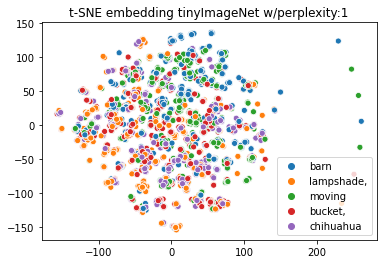

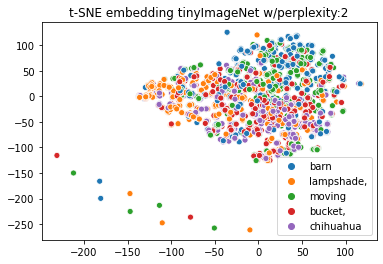

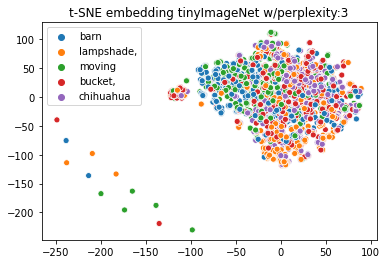

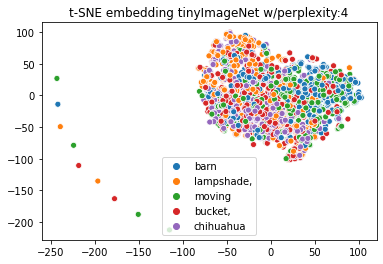

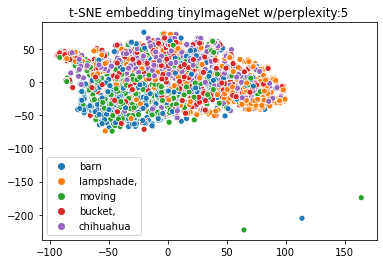

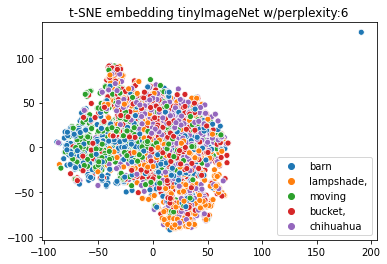

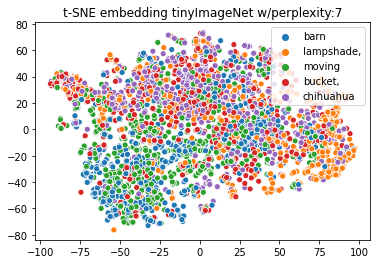

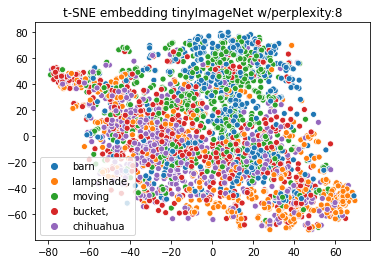

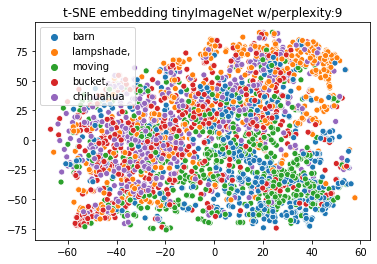

In [31]:
for i in range(1,10,1):
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=3000)
    tsne_results = tsne.fit_transform(X_filtered.reshape(num_samples,-1))
    plt.figure()
    ax = sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1], hue=y_labels)
    ax.set_title(f't-SNE embedding tinyImageNet w/perplexity:{i}')
    fig = ax.get_figure()
    plt.savefig(f't-SNE with perplxity {i}.png', format='png')